# **Text Project: Customer satisfaction assessment**

## **1.0 Download dataset**

In [1]:
!gdown 1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy

Downloading...
From: https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy
To: d:\Onedrive2024\OneDrive\1.0 DS & AI\AIO2024\AIO-Exercise\Module_03\Project-Customer_satisfaction_assessment\IMDB-Dataset.csv

  0%|          | 0.00/66.2M [00:00<?, ?B/s]
  1%|          | 524k/66.2M [00:00<00:12, 5.13MB/s]
  4%|▍         | 2.62M/66.2M [00:00<00:04, 14.3MB/s]
  6%|▋         | 4.19M/66.2M [00:00<00:05, 11.1MB/s]
 12%|█▏        | 7.86M/66.2M [00:00<00:03, 19.4MB/s]
 16%|█▌        | 10.5M/66.2M [00:00<00:02, 20.4MB/s]
 20%|█▉        | 13.1M/66.2M [00:00<00:02, 21.7MB/s]
 24%|██▍       | 15.7M/66.2M [00:00<00:02, 22.2MB/s]
 28%|██▊       | 18.4M/66.2M [00:00<00:02, 22.5MB/s]
 32%|███▏      | 21.0M/66.2M [00:01<00:02, 22.2MB/s]
 36%|███▌      | 23.6M/66.2M [00:01<00:01, 21.9MB/s]
 40%|███▉      | 26.2M/66.2M [00:01<00:01, 21.0MB/s]
 44%|████▎     | 28.8M/66.2M [00:01<00:01, 20.4MB/s]
 47%|████▋     | 30.9M/66.2M [00:01<00:01, 19.9MB/s]
 50%|████▉     | 33.0M/66.2M [00:01<00:01, 20.0MB/s

In [2]:
# Load dataset
import pandas as pd

df = pd.read_csv('./IMDB-Dataset.csv')

In [3]:
# Test
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

## **2.0 Preprocessing**

In [7]:
# Select duplicate rows
duplicated_df = df[df.duplicated()]

In [8]:
duplicated_df

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

In [10]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


In [11]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set([word for word in stopwords.words('english') if word not in ['no', 'not']])

# Expanding contractions
def expand_contractions(text):
    return contractions.fix(text)

# Function to clean data
def preprocess_text(text):

    wl = WordNetLemmatizer()

    soup = BeautifulSoup(text, "html.parser") # Removing html tags
    text = soup.get_text()
    text = expand_contractions(text) # Expanding chatwords and contracts clearing contractions
    emoji_clean = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'',text)
    text = re.sub(r'\.(?=\S)', '. ',text) #add space after full stop
    text = re.sub(r'http\S+', '', text) #remove urls
    text = "".join([
        word.lower() for word in text if word not in string.punctuation
    ]) #remove punctuation and make text lowercase
    text = " ".join([
        wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()]) #lemmatize
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tienhyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tienhyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
df['review'] = df['review'].apply(preprocess_text)

C:\Users\tienhyu\AppData\Local\Temp\ipykernel_22376\838385381.py:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser") # Removing html tags


### **3.0 Data Analysis**

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

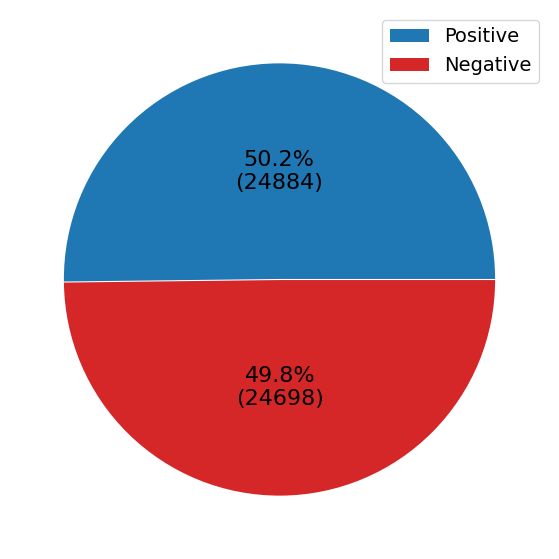

In [15]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

labels = ['positive', 'negative']
# Create pie chart
pie, ax = plt.subplots(figsize=[11,7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0],'tab:red'],textprops={'fontsize': 16})
# plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')
labels = [r'Positive', r'Negative']
plt.legend(labels, loc="best", prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()

#### **Calculate the lengths of samples for each class.**

In [16]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

In [17]:
df_temp

,review,sentiment,words length
0,one reviewer mentioned watching oz episode hoo...,positive,169
1,wonderful little production filming technique ...,positive,86
2,thought wonderful way spend time hot summer we...,positive,86
3,basically family little boy jake think zombie ...,negative,64
4,petter matteis love time money visually stunni...,positive,127
...,...,...,...
49995,thought movie right good job not creative orig...,positive,80
49996,bad plot bad dialogue bad acting idiotic direc...,negative,56
49997,catholic taught parochial elementary school nu...,negative,117
49998,going disagree previous comment side maltin on...,negative,113


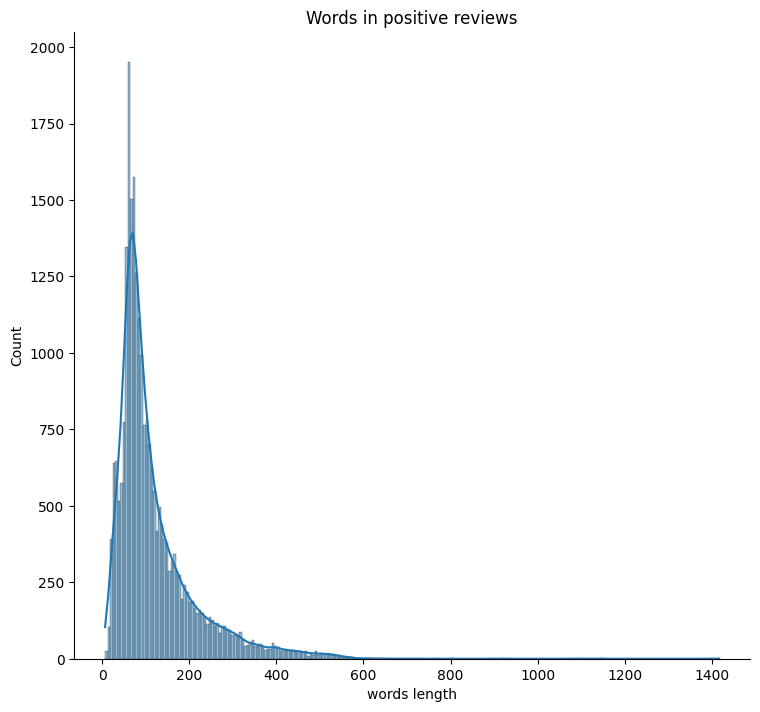

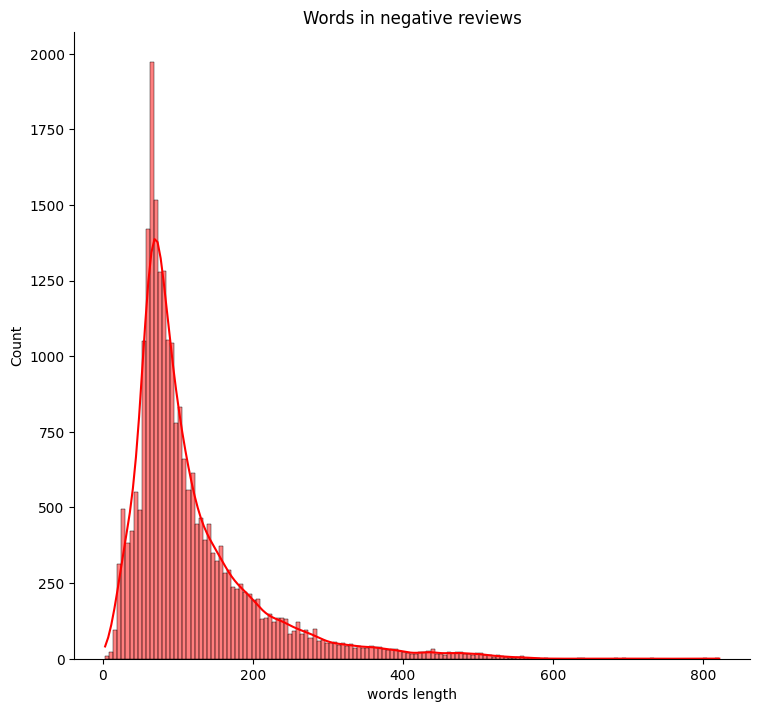

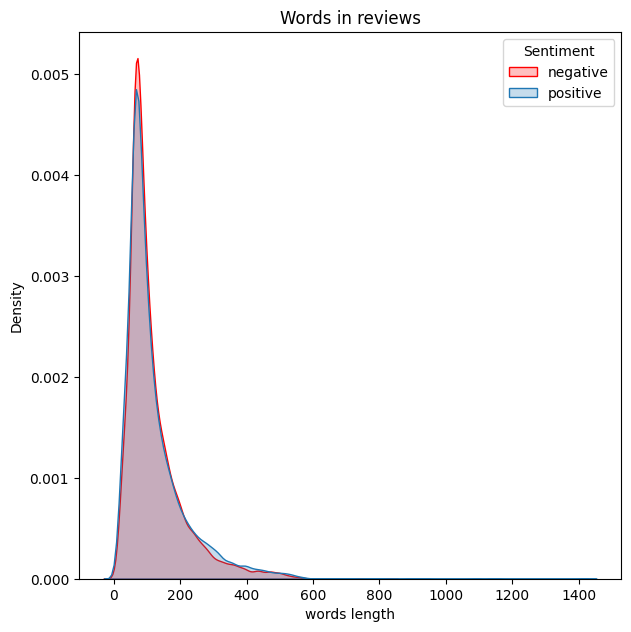

In [18]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['words length'] = words_len

hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length", hue="sentiment", kde=True,  height=7, aspect=1.1, legend=False
).set(title='Words in positive reviews')
plt.show(hist_positive)

hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length", hue="sentiment", kde=True,  height=7, aspect=1.1, legend=False,  palette=['red']
).set(title='Words in negative reviews')
plt.show(hist_negative)

plt.figure(figsize=(7,7.1))
kernel_distibution_number_words_plot  = sns.kdeplot(
    data=df_temp, x="words length", hue="sentiment", fill=True,  palette=[sns.color_palette()[0],'red']
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distibution_number_words_plot)

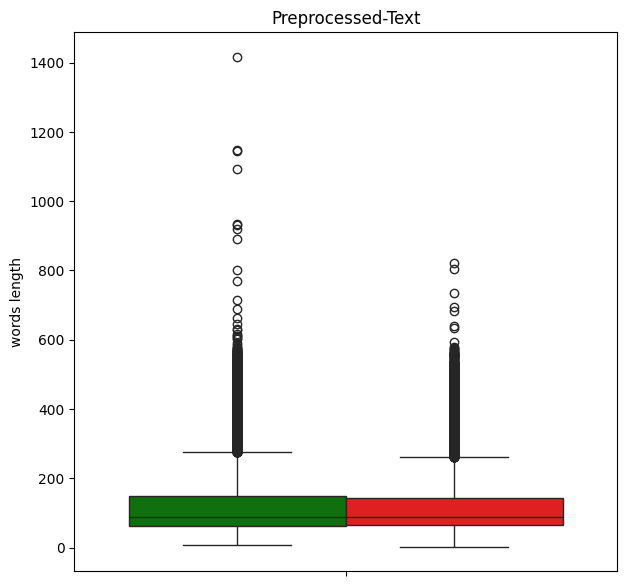

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
box_plot = sns.boxplot(
    hue="sentiment", y='words length', data=df_temp, palette=['green','red'], legend=False
).set(title='Preprocessed-Text')
plt.show(box_plot)

In [20]:
from collections import Counter
words = ' '.join(df['review']).split()
counter = Counter(words)
most = counter.most_common()
vocabs, word_counts = [], []
for word, count in most:
    if (word not in stop) :
        vocabs.append(word)
        word_counts.append(count)

Text(0.5, 1.0, 'Most Common Word In Job Description')

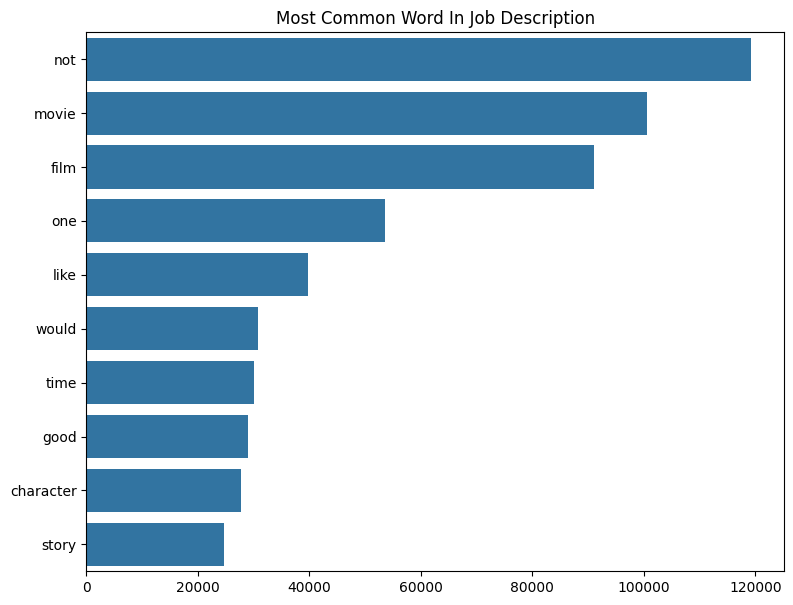

In [21]:
plt.figure(figsize=(9,7))
sns.barplot(x=word_counts[:10],y=vocabs[:10])
plt.title("Most Common Word In Job Description")

In [22]:
word_count_df = pd.DataFrame({
    'word': vocabs,
    'word_count': word_counts
})
word_count_df

,word,word_count
0,not,119179
1,movie,100604
2,film,91129
3,one,53525
4,like,39746
...,...,...
143268,ohsohard,1
143269,effortful,1
143270,frenchonly,1
143271,clatter,1


### **4.0 Train and Test Splitting**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [24]:
x_data = df['review']
x_data[:5]

0    one reviewer mentioned watching oz episode hoo...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
Name: review, dtype: object

In [25]:
label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

### **5.0 Vectorization**

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(x_train, y_train)

TfidfVectorizer(max_features=10000)

In [28]:
x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

In [29]:
x_train_encoded.shape

(39665, 10000)

### **6.0 Train and Evaluate**

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

#### **Decision Tree**

In [31]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [32]:
y_pred = dt_classifier.predict(x_test_encoded)

In [33]:
accuracy_score(y_pred, y_test)

0.6784309771100131

In [34]:
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_classifier.fit(x_train_encoded, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [35]:
y_pred = dt_classifier.predict(x_test_encoded)

In [36]:
accuracy_score(y_pred, y_test)

0.7168498537864273

#### **Random Forest**

In [37]:
rf_classifier = RandomForestClassifier(
    n_estimators=100, max_depth=5, max_features='sqrt', bootstrap=True, random_state=42
)
rf_classifier.fit(x_train_encoded, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [38]:
y_pred = rf_classifier.predict(x_test_encoded)

In [39]:
accuracy_score(y_pred, y_test)

0.8046788343248966

In [40]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred = rf_classifier.predict(x_test_encoded)

In [42]:
accuracy_score(y_pred, y_test)

0.8436018957345972

### **AdaBoost**

In [43]:
adb_classifier = AdaBoostClassifier(
    n_estimators=100, random_state=42
)
adb_classifier.fit(x_train_encoded, y_train)

c:\Users\tienhyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

In [44]:
y_pred = adb_classifier.predict(x_test_encoded)

In [45]:
accuracy_score(y_pred, y_test)

0.8244428758697186

### **Gradient Boosting**

In [46]:
gb_classifier = GradientBoostingClassifier(
    n_estimators=100, random_state=42
)
gb_classifier.fit(x_train_encoded, y_train)

GradientBoostingClassifier(random_state=42)

In [47]:
y_pred = gb_classifier.predict(x_test_encoded)

In [48]:
accuracy_score(y_pred, y_test)

0.8013512150852072

### **XGBoost**

In [49]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_estimators=100)
xgb_classifier.fit(x_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred = xgb_classifier.predict(x_test_encoded)

In [51]:
accuracy_score(y_pred, y_test)

0.8444085913078552

## **Inference**

In [52]:
df['review'][:2]

0    one reviewer mentioned watching oz episode hoo...
1    wonderful little production filming technique ...
Name: review, dtype: object

In [53]:
example_encoded = tfidf_vectorizer.transform(df['review'][:2])

In [54]:
example_encoded.shape

(2, 10000)

In [55]:
example_pred = dt_classifier.predict(example_encoded)

In [56]:
example_pred

array([1, 1])

In [57]:
label_encode.classes_

array(['negative', 'positive'], dtype=object)

In [58]:
label_encode.inverse_transform(example_pred)

array(['positive', 'positive'], dtype=object)